<a href="https://colab.research.google.com/github/hyunjung-kim0524/DL_Study/blob/main/20240426_3_2_DataSet_%EA%B5%AC%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pandas를 이용한 데이터 set 생성

In [1]:
import pandas as pd

file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"

heart_df = pd.read_csv(file_url)
print("Pamdas DataFrame : ", type(heart_df))
heart_df.head()

Pamdas DataFrame :  <class 'pandas.core.frame.DataFrame'>


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


tf.data를 이용한 데이터 set 구성

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.data.experimental import make_csv_dataset

file_name = "/content/drive/MyDrive/Colab Notebooks/data/heart.csv"

heart_ds = make_csv_dataset(file_name, batch_size = 2)

print("tf.data : ", type(heart_ds))

import numpy as np
# numpy 형태로 변환하기(선택사항)
interator = heart_ds.as_numpy_iterator()

print(dict(next(interator)))

Mounted at /content/drive
tf.data :  <class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
{'age': array([44, 35], dtype=int32), 'sex': array([1, 1], dtype=int32), 'cp': array([4, 4], dtype=int32), 'trestbps': array([120, 120], dtype=int32), 'chol': array([169, 198], dtype=int32), 'fbs': array([0, 0], dtype=int32), 'restecg': array([0, 0], dtype=int32), 'thalach': array([144, 130], dtype=int32), 'exang': array([1, 1], dtype=int32), 'oldpeak': array([2.8, 1.6], dtype=float32), 'slope': array([3, 2], dtype=int32), 'ca': array([0, 0], dtype=int32), 'thal': array([b'fixed', b'reversible'], dtype=object), 'target': array([1, 0], dtype=int32)}


pandas 데이터 프레임을 tf.data.Dataset 으로 변환하기

In [3]:
# copy()로 복사하기
df = heart_df.copy()

# pop함수로 label과 피쳐 구분하기 --> target열은 label에 저장되고 df 데이터 프레임에서 target열은 삭제됨
label = df.pop('target')

# tf.data.Dataset의 from_tensor_slices 함수를 사용해서 tf.data.Dataset 으로 데이터 프레임 변경
ds = tf.data.Dataset.from_tensor_slices((dict(df), label))
ds = ds.batch(3)  # 배치단위 설정

print("tf.data : ", type(ds))

print(list(ds.as_numpy_iterator()))


#for batch in ds :
#  print(batch)

tf.data :  <class 'tensorflow.python.data.ops.batch_op._BatchDataset'>
[({'age': array([63, 67, 67]), 'sex': array([1, 1, 1]), 'cp': array([1, 4, 4]), 'trestbps': array([145, 160, 120]), 'chol': array([233, 286, 229]), 'fbs': array([1, 0, 0]), 'restecg': array([2, 2, 2]), 'thalach': array([150, 108, 129]), 'exang': array([0, 1, 1]), 'oldpeak': array([2.3, 1.5, 2.6]), 'slope': array([3, 2, 2]), 'ca': array([0, 3, 2]), 'thal': array([b'fixed', b'normal', b'reversible'], dtype=object)}, array([0, 1, 0])), ({'age': array([37, 41, 56]), 'sex': array([1, 0, 1]), 'cp': array([3, 2, 2]), 'trestbps': array([130, 130, 120]), 'chol': array([250, 204, 236]), 'fbs': array([0, 0, 0]), 'restecg': array([0, 2, 0]), 'thalach': array([187, 172, 178]), 'exang': array([0, 0, 0]), 'oldpeak': array([3.5, 1.4, 0.8]), 'slope': array([3, 1, 1]), 'ca': array([0, 0, 0]), 'thal': array([b'normal', b'normal', b'normal'], dtype=object)}, array([0, 0, 0])), ({'age': array([62, 57, 63]), 'sex': array([0, 0, 1]), 'cp'

이미지 파일을 Dataset으로 불러오기

In [4]:
import tensorflow as tf
from tensorflow.keras.utils import get_file # get_file : Data set 다운로드
import os

train_url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

def get_data(fname, origin, extract) :
  data_dir = get_file(fname = fname, origin = origin, extract = extract)  # get_file : Dataset 다운로드
  data_dir = os.path.join(os.path.dirname(data_dir), 'cats_and_dogs_filtered')  # os.path : Dataset의 위치에 저장해줌
  return data_dir

path_dir = get_data('train.zip', train_url, 'True')

train_dir = os.path.join(path_dir, 'train')
validation_dir = os.path.join(path_dir, 'validation')

print(path_dir, '\n')
print(train_dir, '\n')
print(validation_dir, '\n')

68606236/68606236 [==============================] - 0s 0us/step
/root/.keras/datasets/cats_and_dogs_filtered 

/root/.keras/datasets/cats_and_dogs_filtered/train 

/root/.keras/datasets/cats_and_dogs_filtered/validation 



In [8]:
# 이미지 처리를 위한 케라스 전처리층에 사용

from tensorflow.keras.preprocessing import image_dataset_from_directory

PetImages_ds = image_dataset_from_directory(
    directory = train_dir,
    labels='inferred',  # default : inferred
    batch_size=32,  # default : 32
    image_size=(256,256),   # default : 256,256
    shuffle=True,    # default : Truw
    seed=0
)

 # 2개의 class 생성내역 확인
print("Lebal 0 : ", PetImages_ds.class_names[0])
print("Lebal 1 : ", PetImages_ds.class_names[1])

Found 2000 files belonging to 2 classes.
Lebal 0 :  cats
Lebal 1 :  dogs


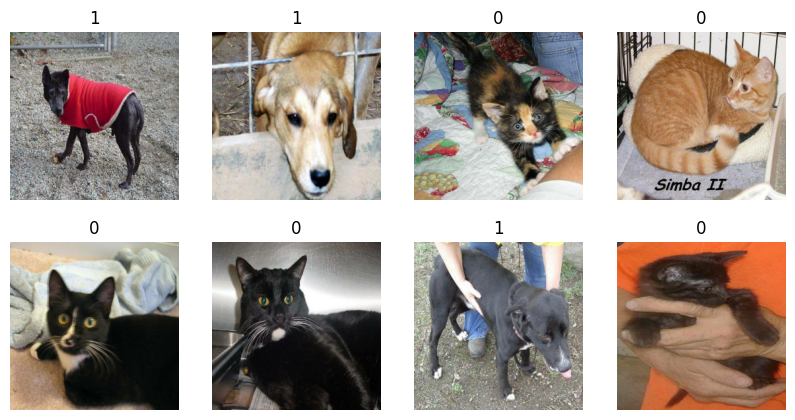

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
for image, label in PetImages_ds.take(1):
  for i in range(8):
    ax=plt.subplot(2,4,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(int(label[i]))
    plt.axis("off")

텍스트 파일을 Dataset으로 불러오기

In [18]:
# 데이터 다운로드
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  26.4M      0  0:00:03  0:00:03 --:--:-- 26.4M


In [19]:
# 데이터 압축풀기
%%time   # 코드셀의 소요시간 표시
!tar -xf aclImdb_v1.tar.gz

CPU times: user 99.9 ms, sys: 11.5 ms, total: 111 ms
Wall time: 11.3 s


In [20]:
# 폴더별 크기 출력하기
!du -h /content/aclImdb

203M	/content/aclImdb/train/unsup
51M	/content/aclImdb/train/neg
51M	/content/aclImdb/train/pos
367M	/content/aclImdb/train
51M	/content/aclImdb/test/neg
51M	/content/aclImdb/test/pos
122M	/content/aclImdb/test
490M	/content/aclImdb


In [24]:
from tensorflow.keras.preprocessing import text_dataset_from_directory

aclImdb_ds = text_dataset_from_directory(
    directory = "/content/aclImdb/train",
    labels = "inferred",
    batch_size = 32,
    seed = 0
)

print("Lebal 0 : ", aclImdb_ds.class_names[0])
print("Lebal 1 : ", aclImdb_ds.class_names[1])
print("Lebal 2 : ", aclImdb_ds.class_names[2])

Found 75000 files belonging to 3 classes.
Lebal 0 :  neg
Lebal 1 :  pos
Lebal 2 :  unsup


In [25]:
for text, label in aclImdb_ds.take(1):
  for i in range(2):
    print(text.numpy()[i])
    print(label.numpy()[i])

b"'Playing for Time' starring Vanessa Redgrave first aired in 1980 and is based on a true story. A true story teaching the lessons of intolerance and the horrors of the Holocaust. In much the way Sharazod (the mythical wife of a King) would save her own life each night by telling her husband a story but never finishing the tale; in 'Playing for Time' the inmates of a death camp play music for the amusement of the guards thereby escaping extermination. But this is no myth it's a very real means of survival for desperate inmates. <br /><br />'Playing for Time' is a great movie but gets a little boring. I found myself playing a video game instead of paying close attention to the movie."
2
b"This is the only full length feature film about the world of bridge. I found the first 10 minutes a bit slow, but after that, the movie is absolutely perfect in describing professional bridge players and how they go about earning a living. <br /><br />Some of the scenes are very funny. I don't think th